In [ ]:
# Jhose Immanuel Sembiring
# 1103202047
# TK44G4
# Visualization Smoke
# Dokumentasi ChatGPT : https://chat.openai.com/share/cfabbab9-1784-4797-ac2f-0bc8137b82f8


In [1]:
import pandas as pd

# file path
file_path = "/content/drive/MyDrive/Semester8/Machine Learning/lecture 4/dataset/smoking.csv"

# mengunggah file menjadi dataframe
df = pd.read_csv(file_path)

# menampilkan dataframe
print(df.head())


   gender  age marital_status highest_qualification nationality ethnicity  \
0    Male   38       Divorced      No Qualification     British     White   
1  Female   42         Single      No Qualification     British     White   
2    Male   40        Married                Degree     English     White   
3  Female   40        Married                Degree     English     White   
4  Female   39        Married          GCSE/O Level     British     White   

       gross_income     region smoke  amt_weekends  amt_weekdays     type  
0    2,600 to 5,200  The North    No           NaN           NaN      NaN  
1       Under 2,600  The North   Yes          12.0          12.0  Packets  
2  28,600 to 36,400  The North    No           NaN           NaN      NaN  
3  10,400 to 15,600  The North    No           NaN           NaN      NaN  
4    2,600 to 5,200  The North    No           NaN           NaN      NaN  


#Feature Statistic

In [2]:
# menampilkan feature statistic
print("Feature Statistic:")
df.describe()

Feature Statistic:


,age,amt_weekends,amt_weekdays
count,1691.000000,421.000000,421.000000
mean,49.836192,16.410926,13.750594
std,18.736851,9.892988,9.388292
min,16.000000,0.000000,0.000000
25%,34.000000,10.000000,7.000000
50%,48.000000,15.000000,12.000000
75%,65.500000,20.000000,20.000000
max,97.000000,60.000000,55.000000


#BoxPlot

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   object 
 1   age                    1691 non-null   int64  
 2   marital_status         1691 non-null   object 
 3   highest_qualification  1691 non-null   object 
 4   nationality            1691 non-null   object 
 5   ethnicity              1691 non-null   object 
 6   gross_income           1691 non-null   object 
 7   region                 1691 non-null   object 
 8   smoke                  1691 non-null   object 
 9   amt_weekends           421 non-null    float64
 10  amt_weekdays           421 non-null    float64
 11  type                   421 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 158.7+ KB


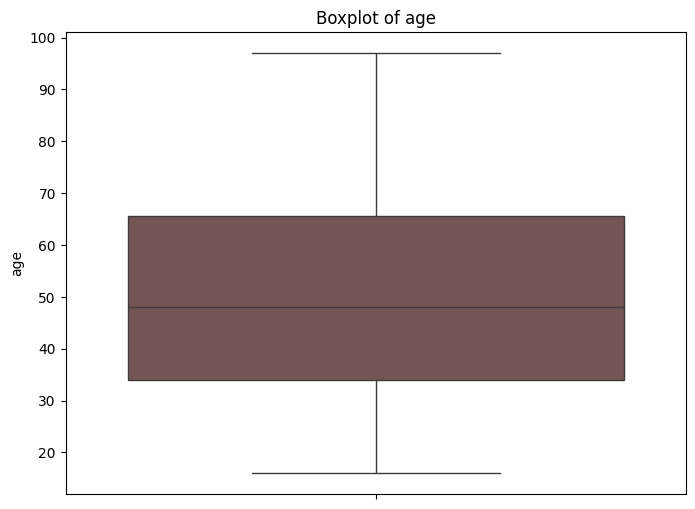

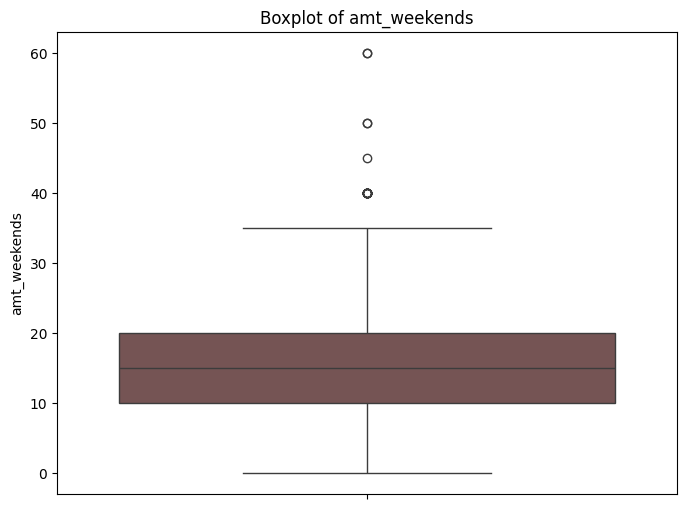

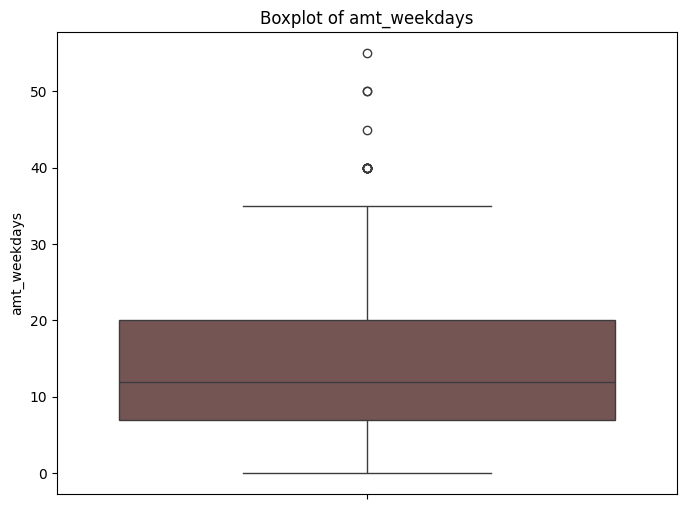

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# memilih kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# mengatur warna
sns.set_palette("pink")

# membuat box plot untuk setiap features
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


#Scatter Plot

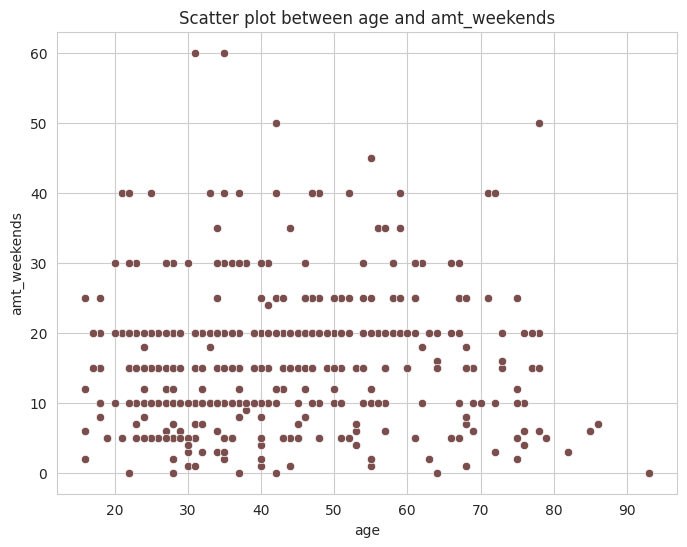

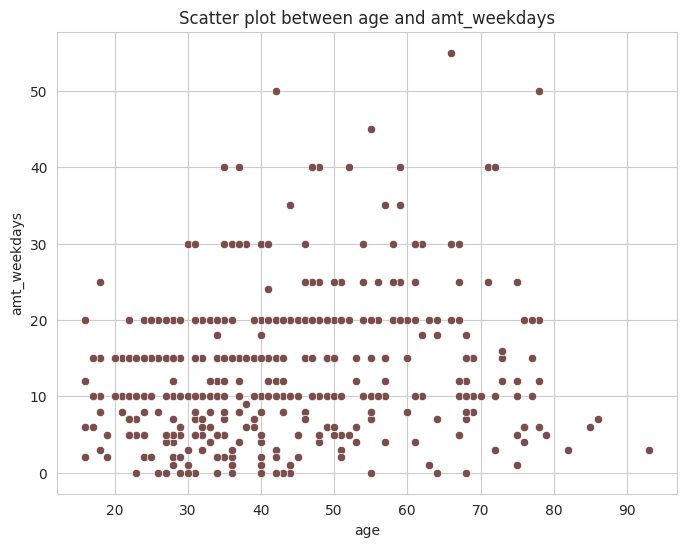

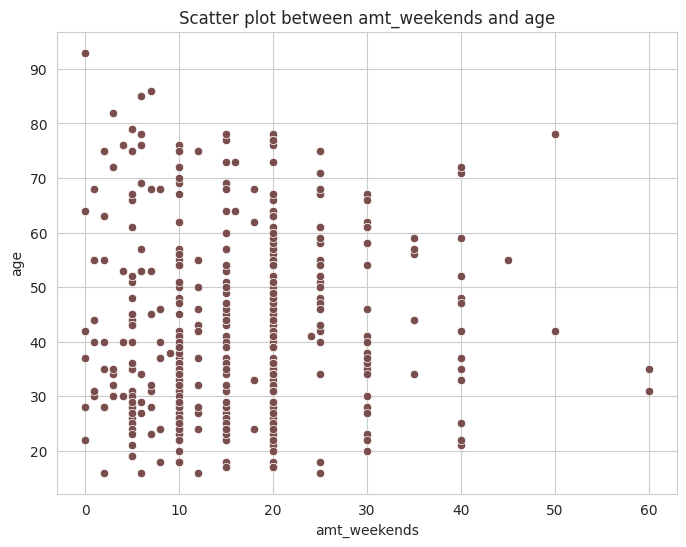

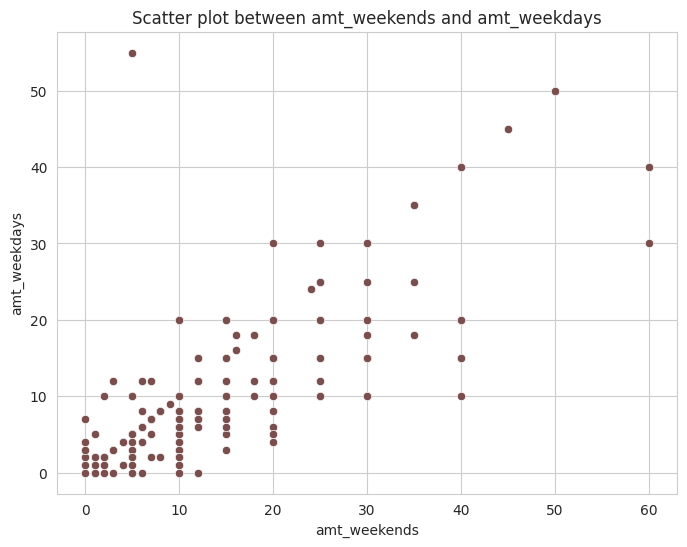

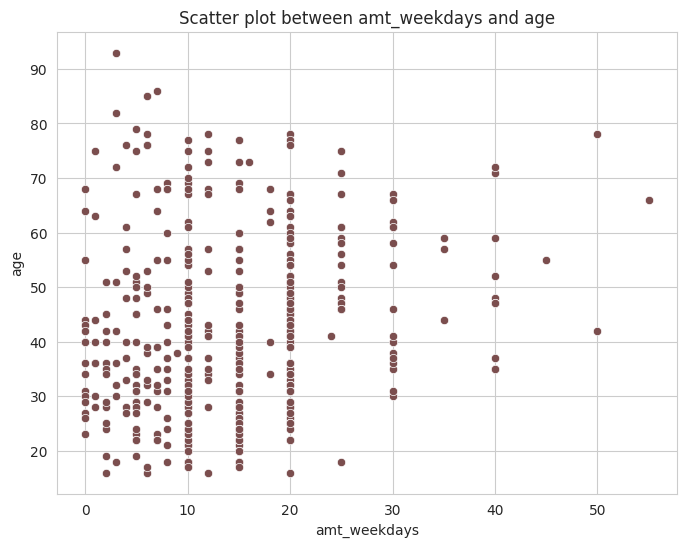

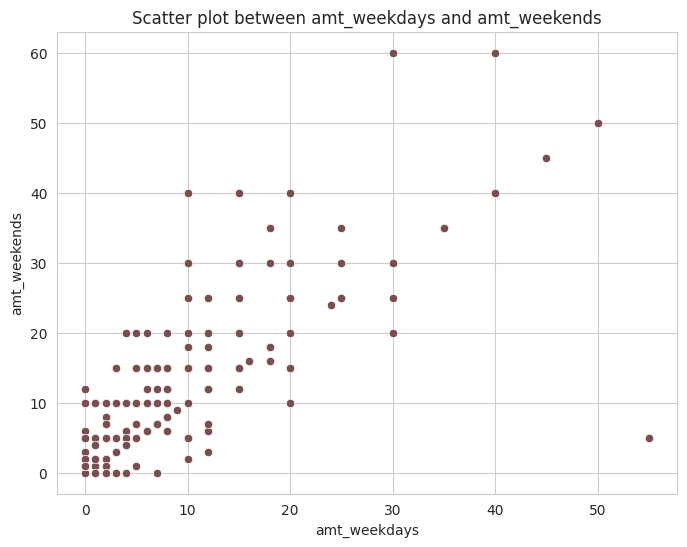

In [6]:
# membuat style seaborn
sns.set_style("whitegrid")

# membuat scatter plot untuk setiap numeric features
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        if i != j:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=col1, y=col2, data=df)
            plt.title(f'Scatter plot between {col1} and {col2}')
            plt.show()


#Heat Map

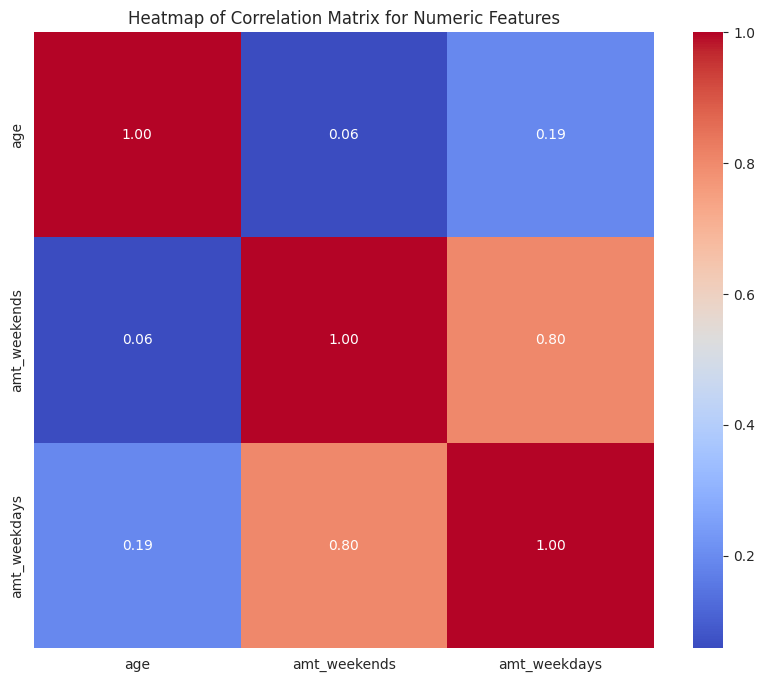

In [7]:
# menghitung korelasi matriks
correlation_matrix = df[numeric_columns].corr()

# membuat heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlation Matrix for Numeric Features")
plt.show()


#Distributions

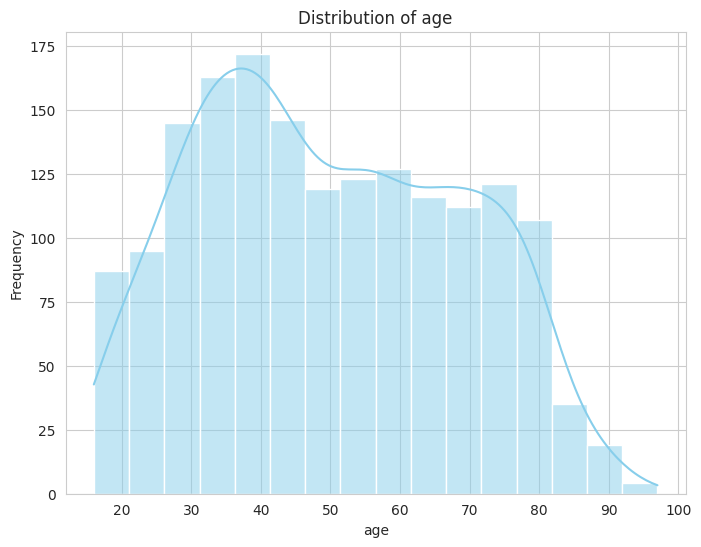

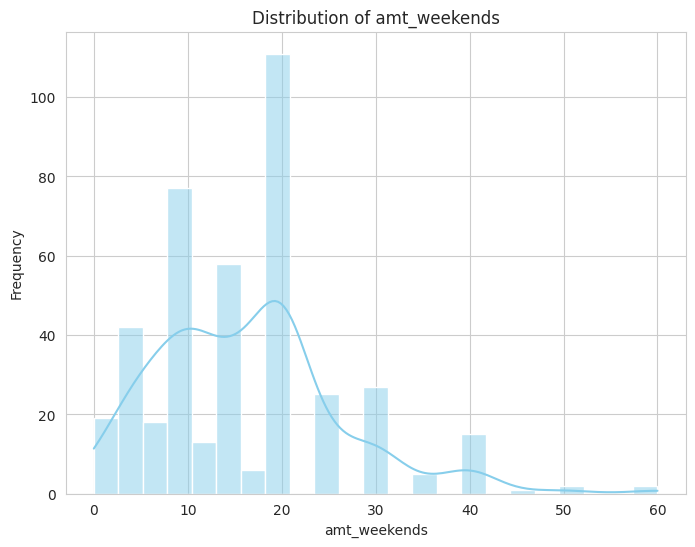

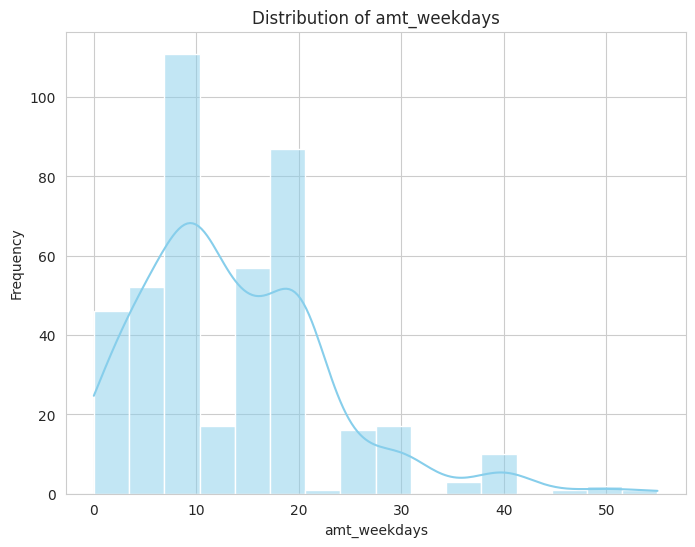

In [8]:
# membuat distribusi untuk setiap numeric feature
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


#Violin Plot

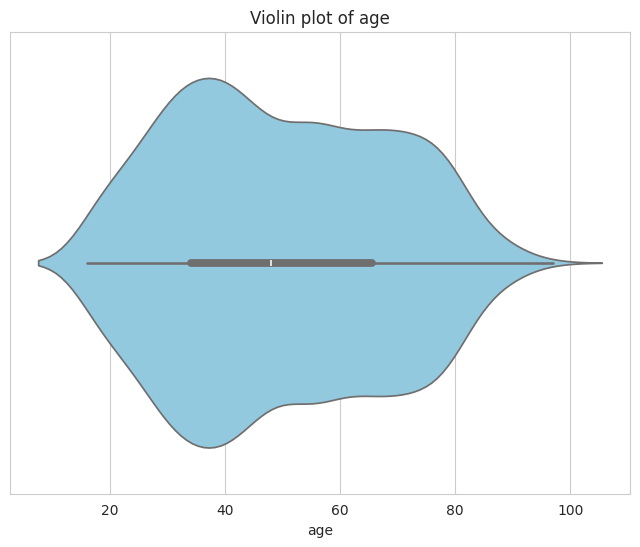

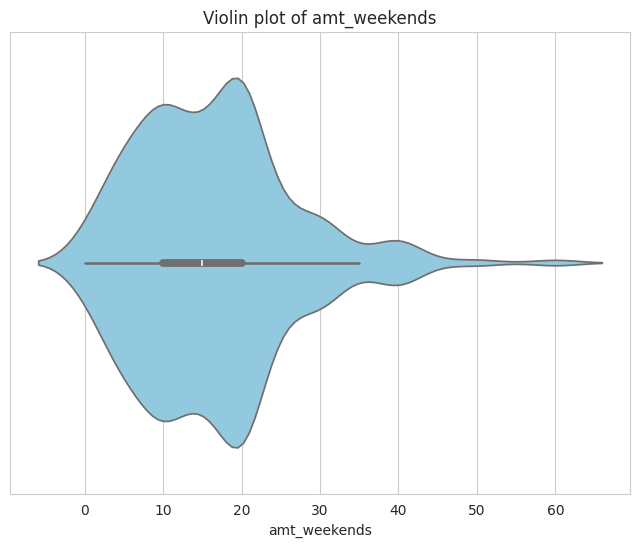

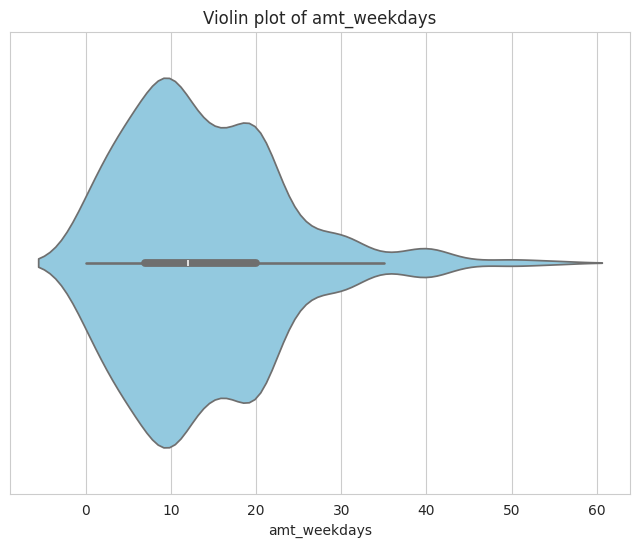

In [9]:
# membuat violin plot utnuk setiap numeric feature
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df[col], color='skyblue')
    plt.title(f'Violin plot of {col}')
    plt.xlabel(col)
    plt.show()


#Line Plot

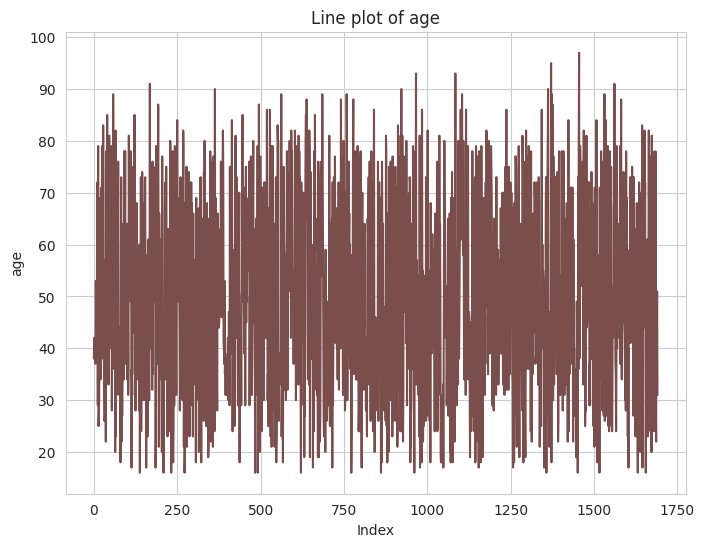

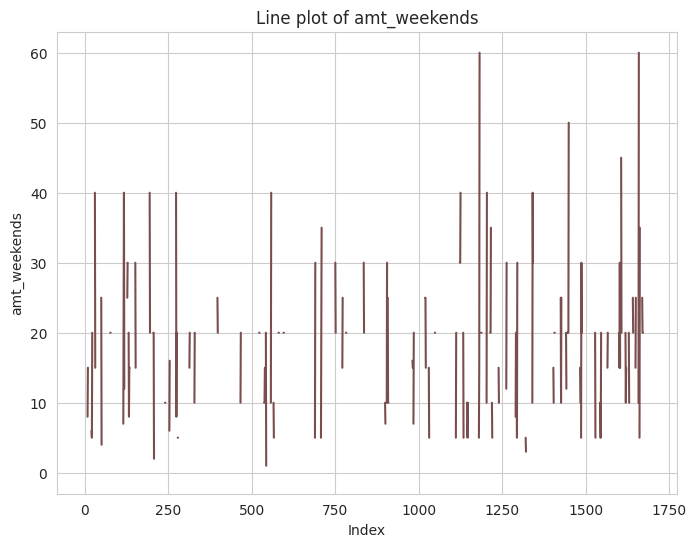

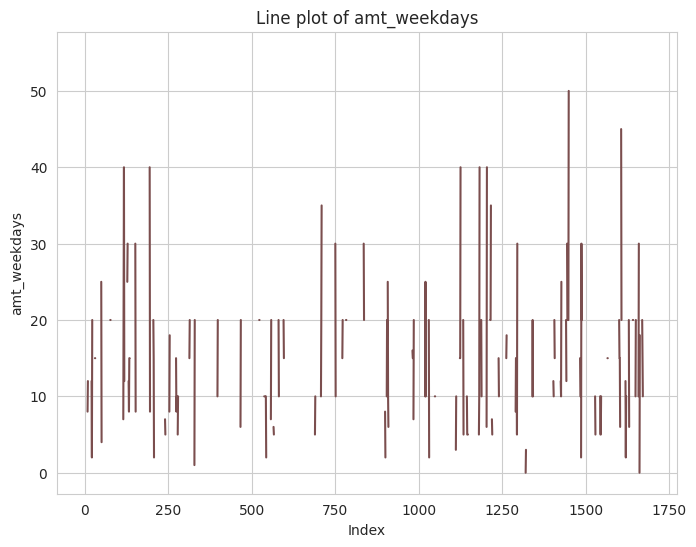

In [10]:
# membuat line plot untuk setiap numeric feature
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.plot(df[col])
    plt.title(f'Line plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


#Nomogram

KeyError: 0

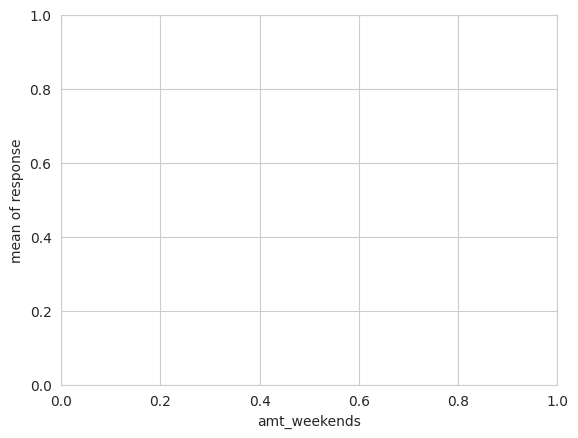

In [11]:
import patsy
from patsy import dmatrices
import numpy as np
from statsmodels.graphics.factorplots import interaction_plot

# membuat desain matriks untuk regresi model
formula = numeric_columns[0] + " ~ " + " + ".join(numeric_columns[1:])
y, X = dmatrices(formula, df, return_type='dataframe')

# Plot nomogram
fig = interaction_plot(X.iloc[:, 1], X.iloc[:, 2], y, colors=['blue'], markers=['o'], ms=10)
plt.title("Nomogram")
plt.xlabel("Independent Variable 1")
plt.ylabel("Independent Variable 2")
plt.show()
